In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [ ]:
decoder = pd.read_csv('feature_scaled_data/decoder.csv')
grouped = decoder.groupby(['코드종류'])
decoder_map = {name[0]: group.set_index('코드').drop('코드종류', axis = 1).squeeze() for name, group in grouped}

decoder_map['gender']
decoder

,코드종류,코드,종류
0,gender,0,남자
1,gender,1,여자
2,age,0,0 ~ 9세
3,age,1,10 ~ 19세
4,age,2,20 ~ 29세
5,age,3,30 ~ 39세
6,age,4,40 ~ 49세
7,age,5,50 ~ 59세
8,age,6,60 ~ 69세
9,age,7,70 ~ 79세


In [ ]:
hdong = pd.read_csv('feature_scaled_data/hdong.csv', index_col=['행정동코드'])
hdong

,시도명,시군구명,읍면동명,주소
행정동코드,,,,
1100000000,서울특별시,NaN,NaN,서울특별시
1111000000,서울특별시,종로구,NaN,서울특별시 종로구
1111051500,서울특별시,종로구,청운효자동,서울특별시 종로구 청운효자동
1111053000,서울특별시,종로구,사직동,서울특별시 종로구 사직동
1111054000,서울특별시,종로구,삼청동,서울특별시 종로구 삼청동
...,...,...,...,...
5183031000,강원특별자치도,양양군,서면,강원특별자치도 양양군 서면
5183032000,강원특별자치도,양양군,손양면,강원특별자치도 양양군 손양면
5183033000,강원특별자치도,양양군,현북면,강원특별자치도 양양군 현북면


In [47]:
oct_07 = pd.read_csv('datas/od_20231001_15/od_20231007_1.csv')

oct_07.head()

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
0,1135064000,1135069500,20231007,19:00,19:00,1,2,0.0,4.0,4,11015,16,17
1,5013061000,5013031000,20231007,15:00,16:00,0,4,0.0,5.0,5,43766,38,7
2,3611052000,3611038000,20231007,10:00,13:00,0,1,0.0,0.0,4,42424,194,7
3,4111158000,4111568000,20231007,16:00,16:00,0,4,0.0,0.0,0,2999,3,6
4,4315025000,4315056000,20231007,14:00,14:00,1,0,1.0,4.0,0,13222,10,11


In [48]:
sep_01 = pd.read_csv('datas/od_20230901_10/od_20230901_1.csv')
sep_01.head()

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
0,1130563500,1130559500,20230901,12:00,13:00,1,3,0.0,1.0,1,10869,58,7
1,2714072000,2714073000,20230901,12:00,12:00,1,4,0.0,0.0,0,2018,4,16
2,3017055500,3017058700,20230901,18:00,18:00,1,2,0.0,4.0,0,14070,39,8
3,2917067300,2917059000,20230901,19:00,19:00,0,4,0.0,0.0,0,2738,9,22
4,2714058000,4729025300,20230901,21:00,22:00,1,1,2.0,3.0,0,43707,85,10


In [56]:
sep_temp1 = sep_01.groupby(['dest_hdong_cd'])['od_cnts'].sum().sort_values(ascending=False).reset_index().head(30)
sep_temp1.head()

,dest_hdong_cd,od_cnts
0,1174069000,241860
1,1171056600,114038
2,4139058900,106799
3,4139059100,101927
4,2635051000,96202


In [78]:
sep_temp2 = sep_01.groupby(['origin_hdong_cd'])['od_cnts'].sum().sort_values(ascending=False).reset_index().head(30)
sep_temp2.head()

,origin_hdong_cd,od_cnts
0,4127357000,117006
1,1168064000,94400
2,1111061500,69082
3,1114055000,68195
4,1154551000,64000


In [79]:
hdong.loc[sep_temp1.iloc[:,0]]

,시도명,시군구명,읍면동명,주소
행정동코드,,,,
1174069000,서울특별시,강동구,둔촌제1동,서울특별시 강동구 둔촌제1동
1171056600,서울특별시,송파구,오륜동,서울특별시 송파구 오륜동
4139058900,경기도,시흥시,정왕본동,경기도 시흥시 정왕본동
4139059100,경기도,시흥시,정왕1동,경기도 시흥시 정왕1동
2635051000,부산광역시,해운대구,우제1동,부산광역시 해운대구 우제1동
4121052000,경기도,광명시,광명2동,경기도 광명시 광명2동
1168066000,서울특별시,강남구,개포1동,서울특별시 강남구 개포1동
2641061000,부산광역시,금정구,장전제2동,부산광역시 금정구 장전제2동
2920063700,광주광역시,광산구,수완동,광주광역시 광산구 수완동


In [80]:
hdong.loc[sep_temp2.iloc[:,0]]

,시도명,시군구명,읍면동명,주소
행정동코드,,,,
4127357000,경기도,안산시 단원구,초지동,경기도 안산시 단원구 초지동
1168064000,서울특별시,강남구,역삼1동,서울특별시 강남구 역삼1동
1111061500,서울특별시,종로구,종로1.2.3.4가동,서울특별시 종로구 종로1.2.3.4가동
1114055000,서울특별시,중구,명동,서울특별시 중구 명동
1154551000,서울특별시,금천구,가산동,서울특별시 금천구 가산동
1174070000,서울특별시,강동구,둔촌제2동,서울특별시 강동구 둔촌제2동
1156054000,서울특별시,영등포구,여의동,서울특별시 영등포구 여의동
1174066000,서울특별시,강동구,성내제3동,서울특별시 강동구 성내제3동
4513069000,전라북도,군산시,수송동,전라북도 군산시 수송동


<Axes: >

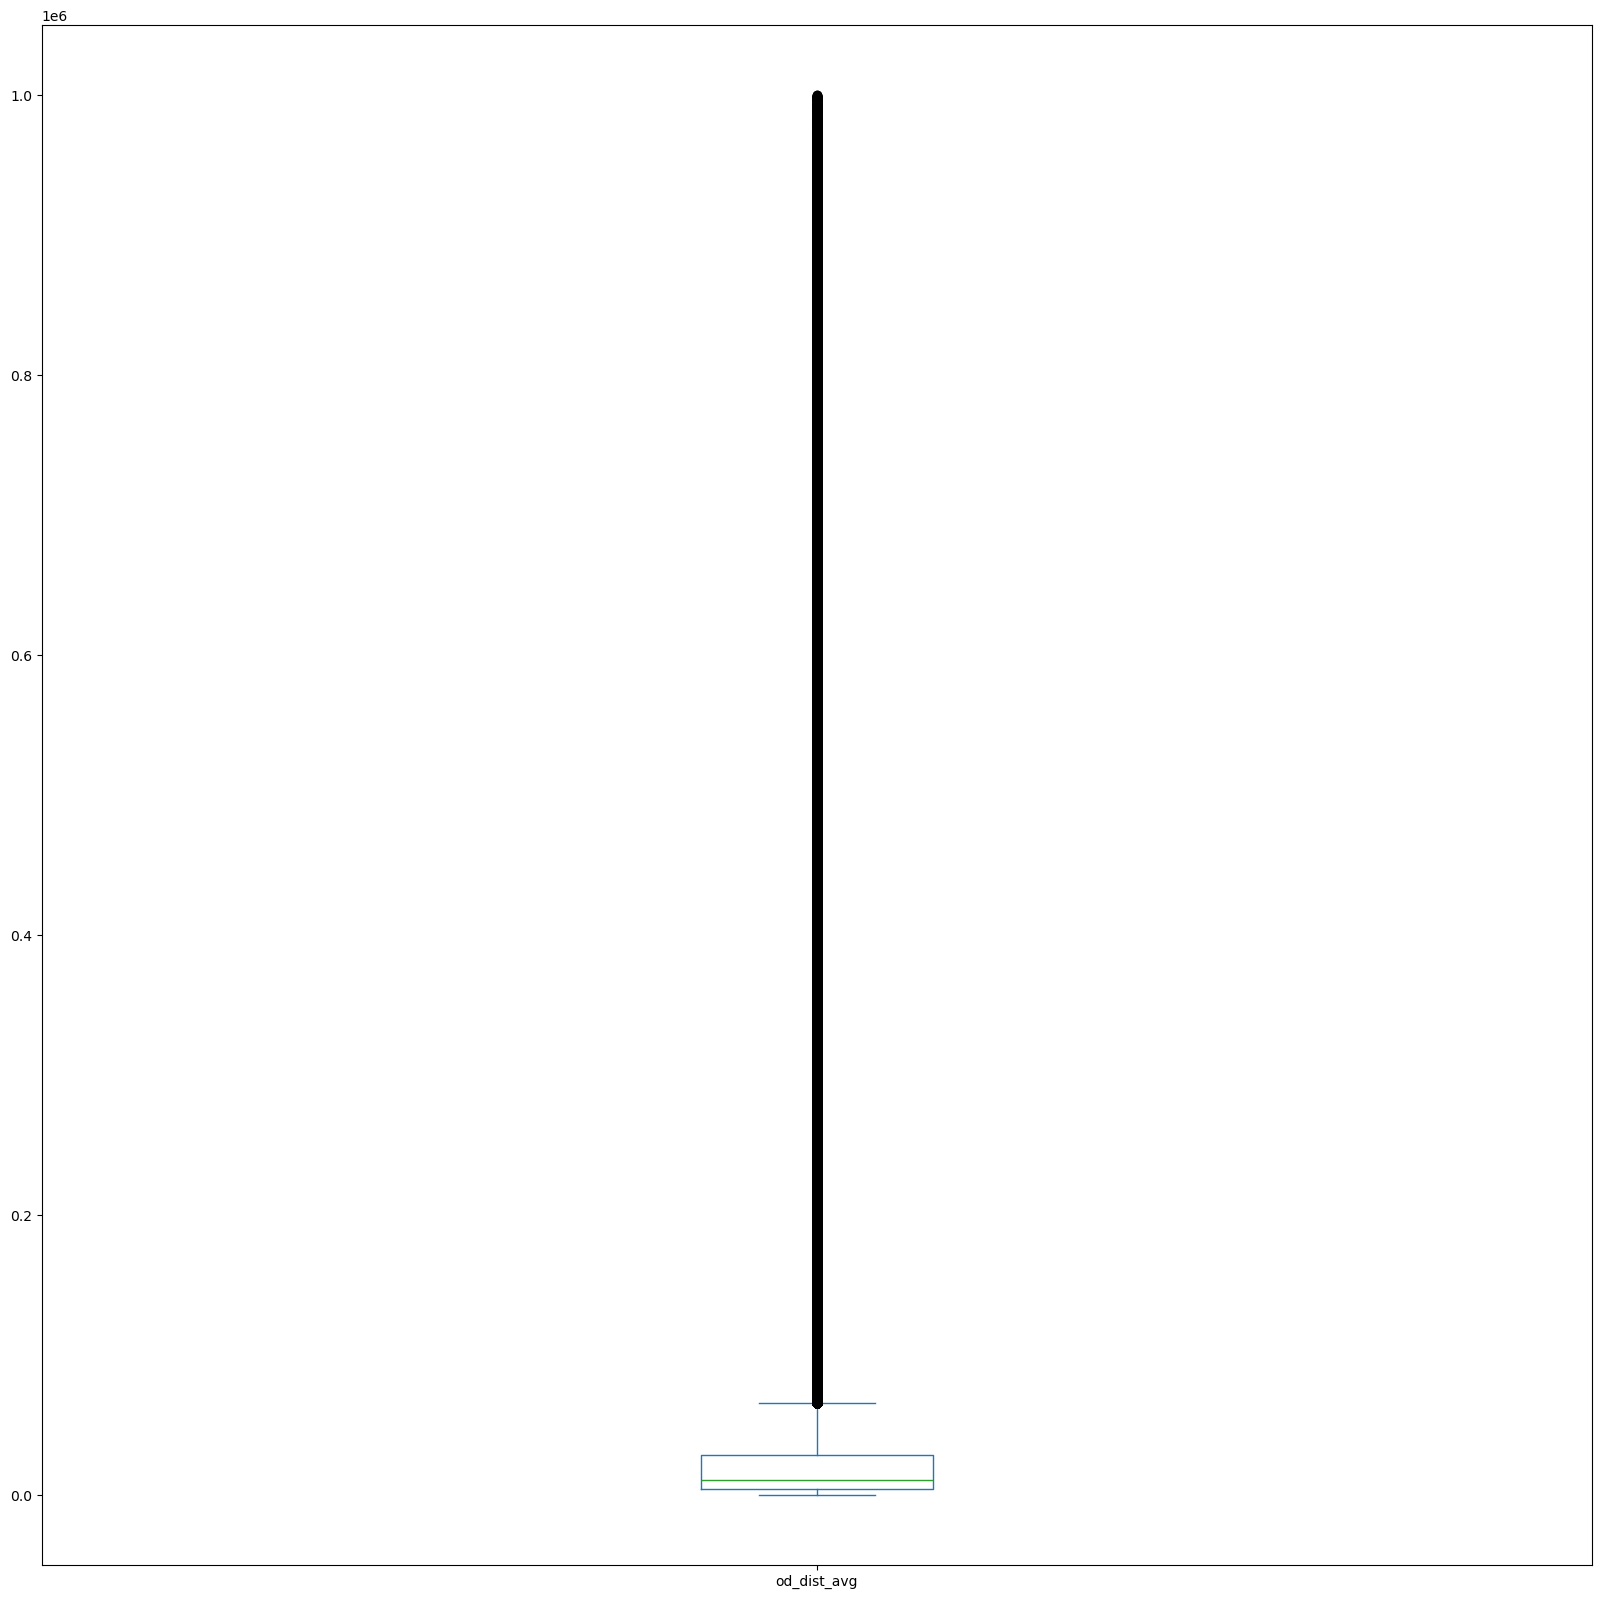

In [76]:
sep_01['od_dist_avg'].plot(
    kind='box',
    figsize=(20,20)
)

<Axes: >

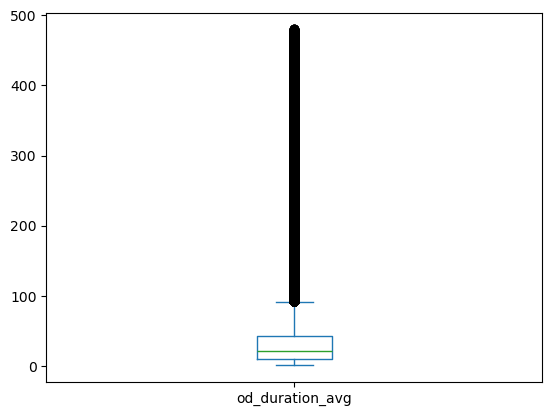

In [69]:
sep_01['od_duration_avg'].plot(
    kind='box'
)

In [81]:
sep_01['modal'].value_counts()

modal
0.0    2727739
4.0     460904
1.0     367482
2.0     104584
3.0      61136
5.0       3211
7.0       1043
Name: count, dtype: int64

In [82]:
import matplotlib.pyplot as plt

In [ ]:
grouped = decoder.groupby(['코드종류'])
decoder_map = {name[0]: group.set_index('코드').drop('코드종류', axis = 1).squeeze() for name, group in grouped}

decoder_map['modal']


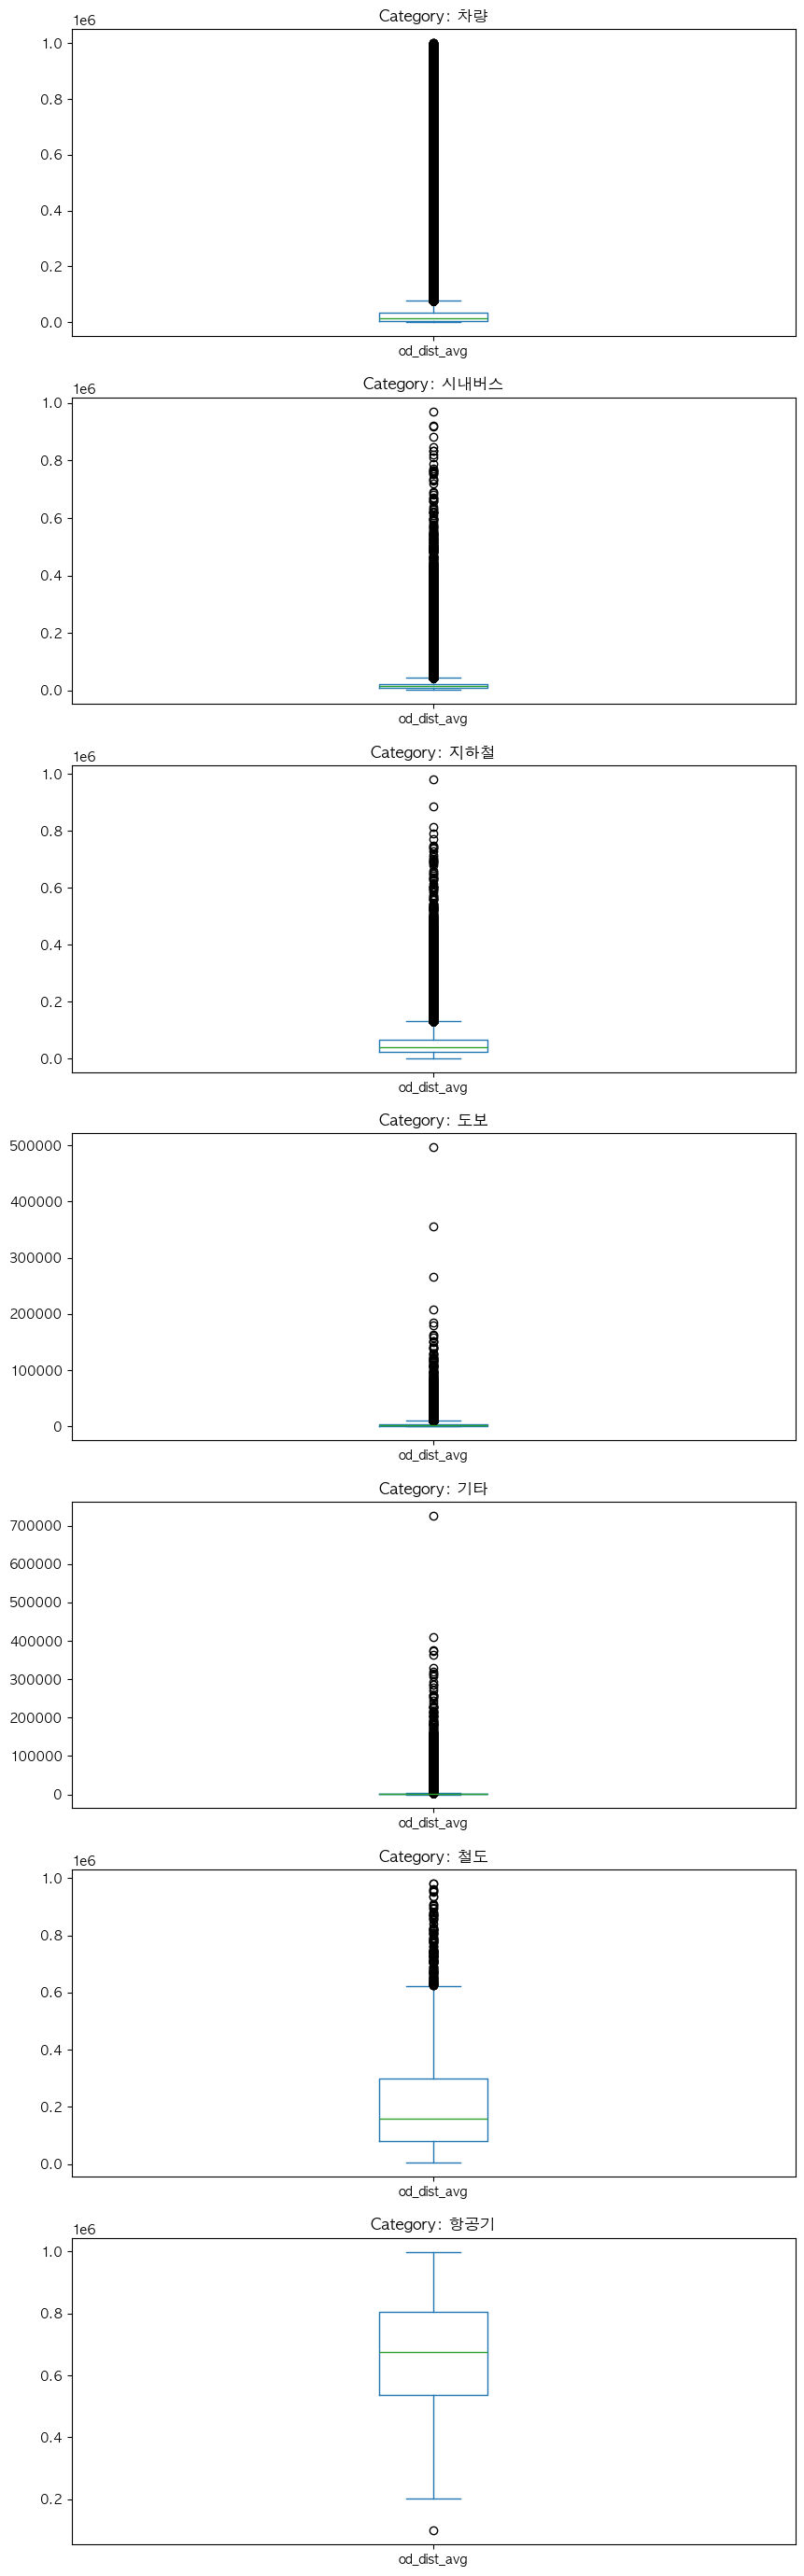

In [129]:
# 데이터프레임이 df라고 가정

category = 'modal'

grouped = sep_01.groupby(category)

fig, axes = plt.subplots(nrows=len(grouped), figsize=(10, 5*len(grouped)))

for (key, group), ax in zip(grouped, axes):
    group['od_dist_avg'].plot(kind='box',ax=ax)
    ax.set_title(f'Category: {decoder_map[category][key]}')
# plt.tight_layout()
plt.show()

In [77]:
(sep_01['od_dist_avg'] <10000).sum()

1740879

In [49]:
temp1 =  oct_07.groupby(['dest_hdong_cd'])['od_cnts'].sum().sort_values(ascending=False).reset_index().head(30)
temp1

,dest_hdong_cd,od_cnts
0,1174069000,228903
1,1171056600,130291
2,2635051000,116250
3,4713057000,95574
4,4121052000,84090
5,4513053000,82219
6,2920063700,77447
7,2641061000,74065
8,4139058900,72832
9,4139059100,69121


In [50]:
temp2 =  oct_07.groupby(['origin_hdong_cd'])['od_cnts'].sum().sort_values(ascending=False).reset_index().head(30)
temp2

,origin_hdong_cd,od_cnts
0,1156054000,109991
1,4127357000,67969
2,1117062500,66069
3,2635052000,65930
4,4513069000,62551
5,1174066000,61646
6,1144066000,61083
7,4833025300,53971
8,1147051000,53077
9,3114057000,52851


In [51]:
hdong.loc[temp1.iloc[:,0]]

,시도명,시군구명,읍면동명,주소
행정동코드,,,,
1174069000,서울특별시,강동구,둔촌제1동,서울특별시 강동구 둔촌제1동
1171056600,서울특별시,송파구,오륜동,서울특별시 송파구 오륜동
2635051000,부산광역시,해운대구,우제1동,부산광역시 해운대구 우제1동
4713057000,경상북도,경주시,황남동,경상북도 경주시 황남동
4121052000,경기도,광명시,광명2동,경기도 광명시 광명2동
4513053000,전라북도,군산시,월명동,전라북도 군산시 월명동
2920063700,광주광역시,광산구,수완동,광주광역시 광산구 수완동
2641061000,부산광역시,금정구,장전제2동,부산광역시 금정구 장전제2동
4139058900,경기도,시흥시,정왕본동,경기도 시흥시 정왕본동


In [52]:
hdong.loc[temp2.iloc[:,0]]

,시도명,시군구명,읍면동명,주소
행정동코드,,,,
1156054000,서울특별시,영등포구,여의동,서울특별시 영등포구 여의동
4127357000,경기도,안산시 단원구,초지동,경기도 안산시 단원구 초지동
1117062500,서울특별시,용산구,한강로동,서울특별시 용산구 한강로동
2635052000,부산광역시,해운대구,우제2동,부산광역시 해운대구 우제2동
4513069000,전라북도,군산시,수송동,전라북도 군산시 수송동
1174066000,서울특별시,강동구,성내제3동,서울특별시 강동구 성내제3동
1144066000,서울특별시,마포구,서교동,서울특별시 마포구 서교동
4833025300,경상남도,양산시,물금읍,경상남도 양산시 물금읍
1147051000,서울특별시,양천구,목1동,서울특별시 양천구 목1동


In [53]:
oct_07_yeo = oct_07[oct_07.dest_hdong_cd == 1156054000]
oct_07_yeo

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
99,1156056000,1156054000,20231007,18:00,19:00,1,2,0.0,0.0,4,33425,58,9
3038,4141057000,1156054000,20231007,11:00,15:00,0,0,0.0,4.0,5,82261,181,26
3259,1156067000,1156054000,20231007,16:00,17:00,1,0,0.0,0.0,4,17571,80,19
3702,1144058500,1156054000,20231007,16:00,17:00,1,0,0.0,3.0,5,9421,84,19
4410,1144059000,1156054000,20231007,19:00,19:00,1,3,0.0,4.0,4,8923,17,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546833,1156056000,1156054000,20231007,17:00,19:00,1,3,0.0,0.0,0,38055,106,5
3546973,1120054000,1156054000,20231007,16:00,18:00,0,2,2.0,0.0,4,93855,117,5
3547658,1154563000,1156054000,20231007,13:00,14:00,0,2,0.0,0.0,3,36819,61,5
3550840,1141058500,1156054000,20231007,16:00,17:00,0,2,0.0,4.0,4,44891,80,5


In [54]:
%reset

Nothing done.
